# Subband Analysis with octave filter bank

## This is room acustic parameter estimation
Developed by:
        Suradej Duangpummet: PhD candidate in SIIT-JAIST.
        
Date: March 20, 2018.

Note:
-The first parameter is reverberantation time or RT or T60.
-wavfile.read('classroom.wav') Cannot read 24 bit depth format!!!!

In [107]:
from __future__ import division

import scipy as sp
import numpy as np 
import math
import matplotlib.pyplot as plt 

from numpy import fft, cos, sin, pi, arange
from scipy.io import wavfile
from scipy.signal import butter, lfilter, freqz, kaiserord, firwin
#from scipy.fftpack import fft, ifft
from scipy import fft, arange , signal
from matplotlib import gridspec

from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid,axes, show

import thinkdsp
import thinkplot

%matplotlib inline

# pylab module Test 

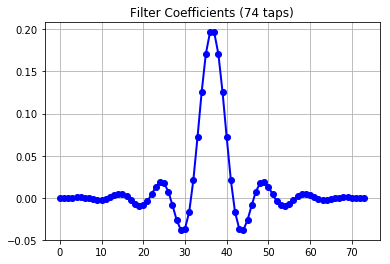

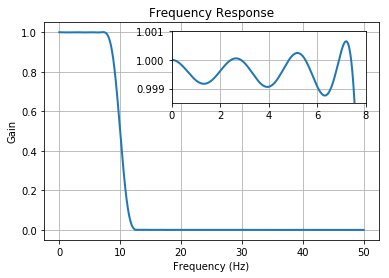

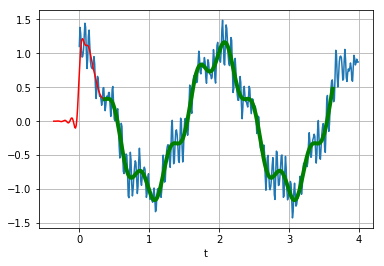

In [108]:
#------------------------------------------------
# Create a signal for demonstration.
#------------------------------------------------

sample_rate = 100.0
nsamples = 400
t = arange(nsamples) / sample_rate
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)


#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------

# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 10.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, x)

#------------------------------------------------
# Plot the FIR filter coefficients.
#------------------------------------------------

figure(1)
plot(taps, 'bo-', linewidth=2)
title('Filter Coefficients (%d taps)' % N)
grid(True)

#------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------

figure(2)
clf()
w, h = freqz(taps, worN=8000)
plot((w/pi)*nyq_rate, abs(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
ylim(-0.05, 1.05)
grid(True)

# Upper inset plot.
ax1 = axes([0.42, 0.6, .45, .25])
plot((w/pi)*nyq_rate, abs(h), linewidth=2)
xlim(0,8.0)
ylim(0.9985, 1.001)
grid(True)

#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(3)
# Plot the original signal.
plot(t, x)
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=4)

xlabel('t')
grid(True)

show()

In [109]:
Fs,sound1 = wavfile.read('t20101.wav')

In [110]:
Fs

44100

In [111]:
sound1

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

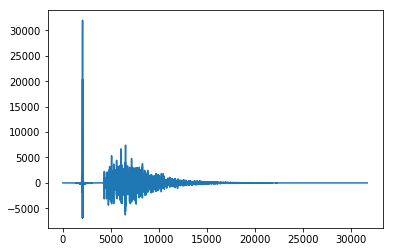

In [112]:
plt.plot(sound1)

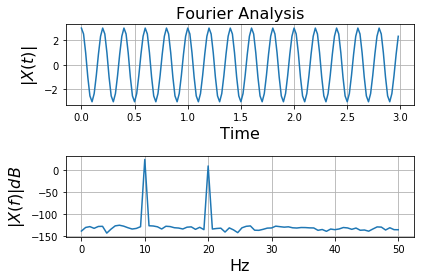

In [113]:
f = 10.
f2 = 20
fs = 50.
t = arange(0,3,1/fs)


x = 3*np.cos(np.pi*f*t) + 0.1*np.sin(np.pi*f2*t)
input_signal = x
Xf = np.fft.rfft(x)
AXf = 10*np.log10(np.abs(Xf))

#The signal in Time Domain plot
plt.subplot(2, 1, 1)
plt.plot(t,x)
plt.grid()
plt.xlabel("Time",fontsize=16)
plt.ylabel(r'$|X(t)|$',fontsize=16)
plt.title("Fourier Analysis",fontsize=16)

#Fourier Transform to Frequency Domain plot
plt.subplot(2, 1, 2)
plt.plot(np.linspace(0,fs,len(Xf)),AXf)
plt.grid()
plt.xlabel("Hz",fontsize=16)
plt.ylabel('$|X(f)| dB$',fontsize=16)

plt.tight_layout()


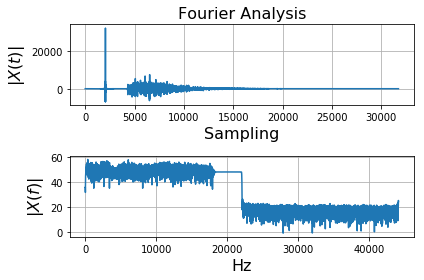

In [163]:
#Read Speech+Impulse Response signal (in WAV format with 16 bit depth)
Fs,sound1 = wavfile.read('t20101.wav')
x = sound1
rir_1 = x
n = arange(0,len(x),1)

#Fourier Transform
Xf = np.fft.rfft(x)
#Amplitude
AXf = 10*np.log10(np.abs(Xf))

#Time Domain plot
plt.subplot(2, 1, 1)
plt.plot(n,x)
plt.grid()
plt.xlabel("Sampling",fontsize=16)
plt.ylabel(r'$|X(t)|$',fontsize=16)
plt.title("Fourier Analysis",fontsize=16)

#Frequency Domain plot
plt.subplot(2, 1, 2)
plt.plot(np.linspace(0,Fs,len(Xf)),AXf)
plt.grid()
plt.xlabel("Hz",fontsize=16)
plt.ylabel('$|X(f)|$',fontsize=16)

plt.tight_layout()

## Butter FIR bandpass Filtert

In [115]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

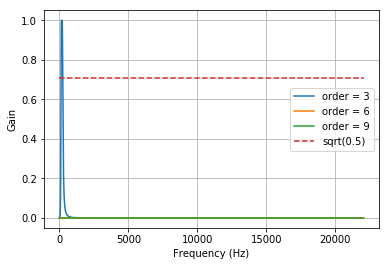

In [116]:
#n = len(sound1)
#T = (1/Fs)*n
#t = np.linspace(0, T, nsamples, endpoint=False)

#Band 1 125-250 Hz
lowcut = 125.0
highcut = 250.0

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
    b, a = butter_bandpass(lowcut, highcut, Fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((Fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * Fs], [np.sqrt(0.5), np.sqrt(0.5)],
         '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')



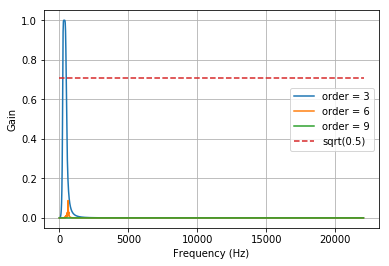

In [117]:
#Band 1 125-250 Hz
lowcut = 250.0
highcut = 500.0

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
    b, a = butter_bandpass(lowcut, highcut, Fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((Fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * Fs], [np.sqrt(0.5), np.sqrt(0.5)],
         '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

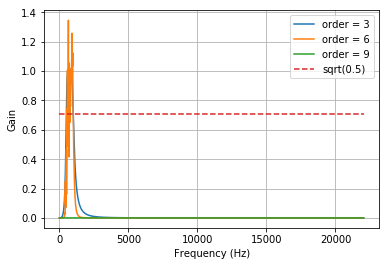

In [118]:
lowcut = 500.0
highcut = 1000.0

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
    b, a = butter_bandpass(lowcut, highcut, Fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((Fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * Fs], [np.sqrt(0.5), np.sqrt(0.5)],
         '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

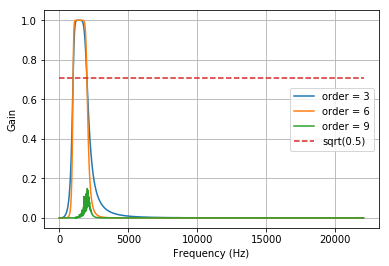

In [119]:
lowcut = 1000.0
highcut = 2000.0

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
    b, a = butter_bandpass(lowcut, highcut, Fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((Fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * Fs], [np.sqrt(0.5), np.sqrt(0.5)],
         '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

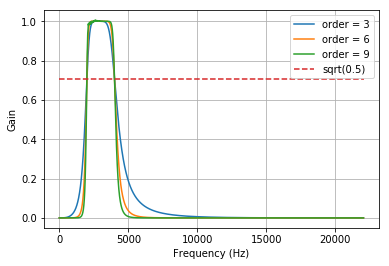

In [120]:
lowcut = 2000.0
highcut = 4000.0

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
    b, a = butter_bandpass(lowcut, highcut, Fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((Fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * Fs], [np.sqrt(0.5), np.sqrt(0.5)],
         '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

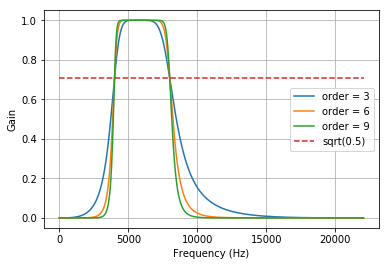

In [121]:
lowcut = 4000.0
highcut = 8000.0

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
    b, a = butter_bandpass(lowcut, highcut, Fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((Fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * Fs], [np.sqrt(0.5), np.sqrt(0.5)],
         '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

In [122]:
fcentre = 125
fd = np.power(2,1/2)
fupper = fcentre *fd
flower = fcentre/fd
print("freq upper",fupper)
print("freq lower",flower)

freq upper 176.7766952966369
freq lower 88.38834764831843


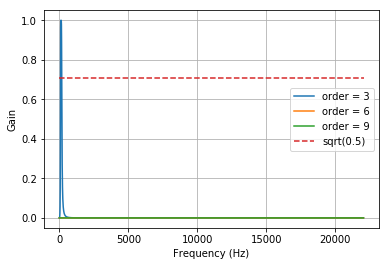

In [123]:
fcentre = 125
fd = np.power(2,1/2)
highcut = fcentre *fd
lowcut = fcentre/fd

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
    b, a = butter_bandpass(lowcut, highcut, Fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((Fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * Fs], [np.sqrt(0.5), np.sqrt(0.5)],
         '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

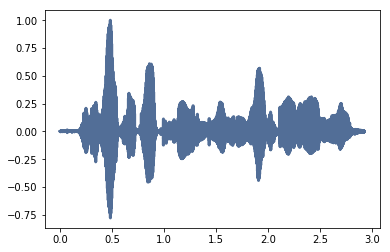

In [150]:
speech1 = thinkdsp.read_wave('TIMIT_Test_up441.wav')
speech1.normalize()
speech1.plot()
speech1.make_audio()

In [166]:
RIR = thinkdsp.read_wave('t20101.wav')
RIR.make_audio()

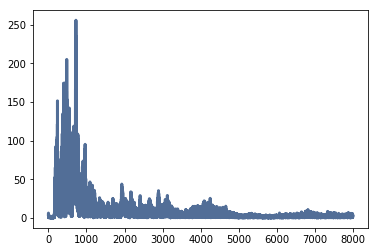

In [125]:
spec1 = speech1.make_spectrum()
#spec = output_f1.make_spectrum()
spec1.plot()

## Convolution

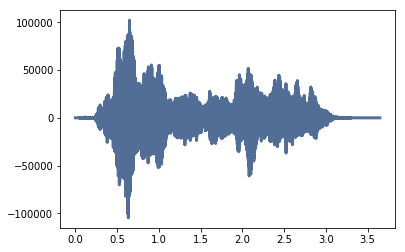

In [165]:
convolved_s1 = speech1.convolve(rir_1)
convolved_s1.plot()
convolved_s1.make_audio()

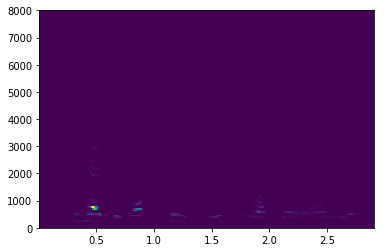

In [127]:
f,t,Sxx = sp.signal.spectrogram(speech1.ys,speech1.framerate)
plt.pcolormesh(t,f,Sxx)
plt.show()

In [128]:
output_f1?

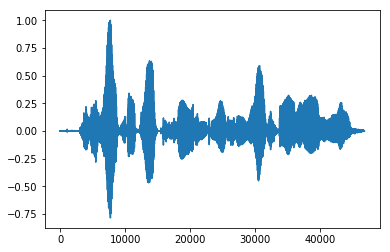

In [129]:
plt.plot(speech1.ys)
plt.show()

In [160]:
fcentre = 125
fd = np.power(2,1/2)
highcut = fcentre *fd
lowcut = fcentre/fd
Fs = speech1.framerate

b, a = butter_bandpass(lowcut, highcut, Fs, order=8)
y_f1 = sp.signal.filtfilt(b,a,speech1.ys)

In [161]:
fcentre = 250
fd = np.power(2,1/2)
highcut = fcentre *fd
lowcut = fcentre/fd
Fs = speech1.framerate

b, a = butter_bandpass(lowcut, highcut, Fs, order=8)
y_f250 = sp.signal.filtfilt(b,a,speech1.ys)

In [162]:
fcentre = 500
fd = np.power(2,1/2)
highcut = fcentre *fd
lowcut = fcentre/fd
Fs = speech1.framerate

b, a = butter_bandpass(lowcut, highcut, Fs, order=8)
y_f500 = sp.signal.filtfilt(b,a,speech1.ys)

In [158]:
fcentre = 1000
fd = np.power(2,1/2)
highcut = fcentre *fd
lowcut = fcentre/fd
Fs = speech1.framerate

b, a = butter_bandpass(lowcut, highcut, Fs, order=8)
y_f500 = sp.signal.filtfilt(b,a,speech1.ys)

In [157]:
fcentre = 2000
fd = np.power(2,1/2)
highcut = fcentre *fd
lowcut = fcentre/fd
Fs = speech1.framerate

b, a = butter_bandpass(lowcut, highcut, Fs, order=8)
y_f2k = sp.signal.filtfilt(b,a,speech1.ys)

In [156]:
fcentre = 4000
fd = np.power(2,1/2)
highcut = fcentre *fd
lowcut = fcentre/fd
Fs = speech1.framerate

b, a = butter_bandpass(lowcut, highcut, Fs, order=8)
y_f4k = sp.signal.filtfilt(b,a,speech1.ys)

In [167]:
fcentre = 8000
fd = np.power(2,1/2)
highcut = fcentre *fd
lowcut = fcentre/fd
Fs = speech1.framerate
b, a = butter_bandpass(lowcut, highcut, Fs, order=8)
y_f4k = sp.signal.filtfilt(b,a,speech1.ys)

In [ ]:
plt.plot(y_f500)
plt.show()